<a href="https://colab.research.google.com/github/faultlady/StockPricePrediciton_LSTM_Versus_LSTM/blob/main/AxaStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AXA stock**

- Srishti Dubey
- 19070240319

# **Implementation of RNN**

In [ ]:
!pip install yfinance
!pip install yahoofinancials 

In [ ]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
from pandas import datetime
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
dataset_train = yf.download('CS.PA', 
                      start='2016-01-01', 
                      end='2019-12-31', 
                      progress=False)

In [ ]:
training_set = dataset_train.iloc[:, 1:2].values


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
dataset_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,24.805000,24.820000,24.110001,24.334999,17.294760,7245076
2016-01-05,24.660000,24.665001,24.010000,24.344999,17.301870,4125617
2016-01-06,24.245001,24.469999,23.969999,24.254999,17.237904,6395411
2016-01-07,23.500000,23.840000,23.280001,23.690001,16.836365,9580818
2016-01-08,23.639999,23.940001,23.245001,23.245001,16.520105,8706279
...,...,...,...,...,...,...
2019-12-23,25.309999,25.415001,25.209999,25.389999,22.273109,3952999
2019-12-24,25.260000,25.360001,25.190001,25.260000,22.159069,1072973
2019-12-25,25.260000,25.260000,25.260000,25.260000,22.159069,0


In [ ]:
X_train = []
y_train = []
for i in range(1, 1022):
    X_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)

Epoch 1/500
32/32 [==============================] - 0s 5ms/step - loss: 0.2584
Epoch 2/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0498
Epoch 3/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0234
Epoch 4/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0184
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 6/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0099
Epoch 7/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0081
Epoch 8/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 9/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 10/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 11/500
32/32 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 12/500
32/32 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 13/500
32/32 [=================

In [ ]:
dataset_test = yf.download('CS.PA', 
                      start='2020-01-01', 
                      end='2020-06-30', 
                      progress=False)

In [ ]:
dataset_test["Date"] = dataset_test.index

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_test.shape

(125, 7)

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(1, 125):
    X_test.append(inputs[i-1:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

(124, 1)

In [ ]:
real_stock_price = real_stock_price.reshape((125,))
predicted_stock_price = predicted_stock_price.reshape((124,))

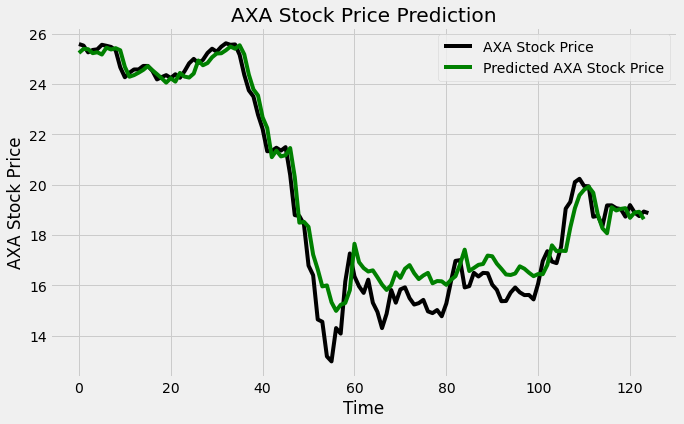

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'AXA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AXA Stock Price')
plt.title('AXA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AXA Stock Price')
plt.legend()
plt.show()

# **Implementation of ARIMA**

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

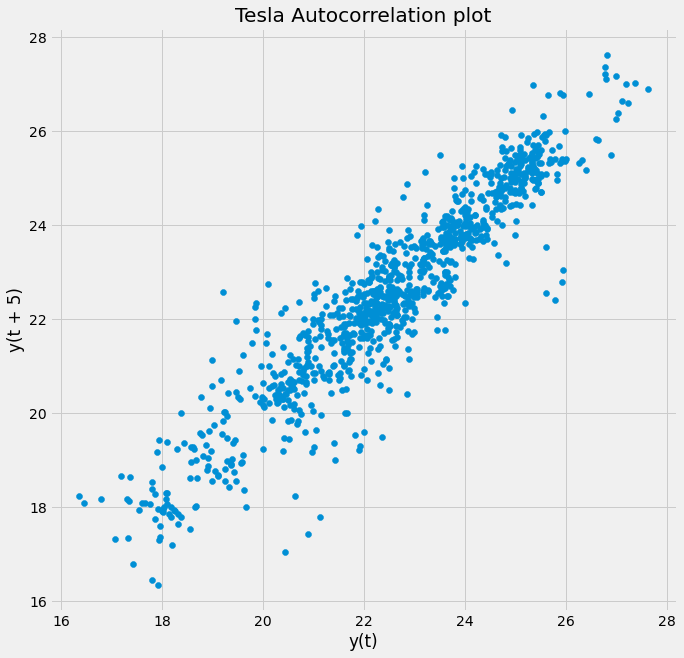

In [ ]:
plt.figure(figsize=(10,10))
lag_plot(dataset_train['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

In [ ]:
history = [x for x in training_set]
model_predictions = []
N_test_observations = len(real_stock_price) 
for time_point in range(N_test_observations):
  model = ARIMA(history, order=(5,1,0))
  model_fit = model.fit(disp=0)
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat)
  true_test_value = real_stock_price[time_point]
  history.append(true_test_value)


MSE_error = mean_squared_error(real_stock_price, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

    

Testing Mean Squared Error is 0.30700933802061914


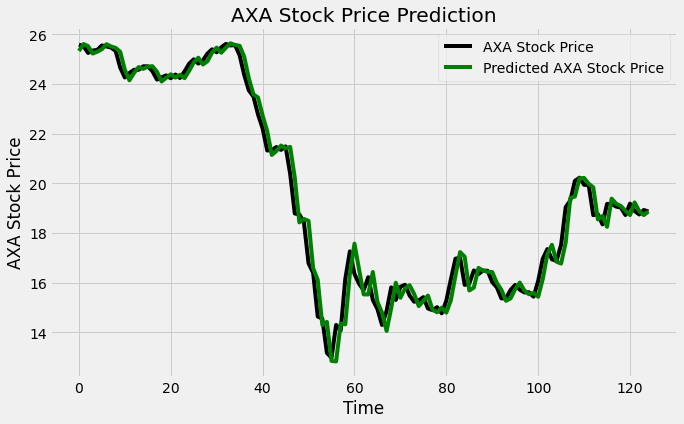

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'AXA Stock Price')
plt.plot(model_predictions, color = 'green', label = 'Predicted AXA Stock Price')
plt.title('AXA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AXA Stock Price')
plt.legend()
plt.show()


# **Stock Visualization**

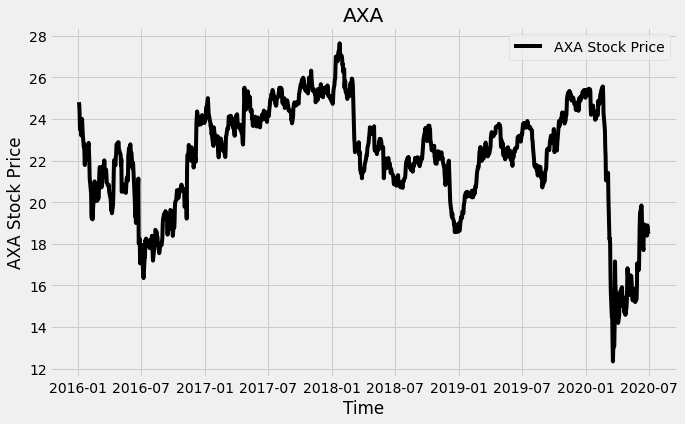

In [ ]:
plt.plot(df['Open'], color = 'black', label = 'AXA Stock Price')
#plt.plot(model_predictions, color = 'green', label = 'Predicted AXA Stock Price')
plt.title('AXA')
plt.xlabel('Time')
plt.ylabel('AXA Stock Price')
plt.legend()
plt.show()

In [ ]:
df = yf.download('CS.PA', 
                      start='2016-01-01', 
                      end='2020-06-30', 
                      progress=False)